In [468]:
import importlib
import TCExtraSourceAnalysis_beta as SAn
import TCTriggerFunctions as TF
import matplotlib.pyplot as plt
import numpy as np
import LCanalyses as LCA
import LCPreset as LCP
#import scipy.optimize as opt
#import itertools as itt
import os
importlib.reload(TF)
importlib.reload(SAn)
importlib.reload(LCA)
importlib.reload(LCP)


<module 'LCPreset' from '/mnt/Secdrive/TSmain/Pip_test/trigger_codes_github/LCPreset.py'>

In [495]:
#["IC348", "NGC1333", "NGC2024", "NGC2068", "OMC23", "OPHCORE", "SERPM","SERPS" ]
mod_date ="190606"
region = "SERPM"
wl = "850"
snames,dic = LCP.JCMTTransient(6,mod_date,wl="850")

In [496]:
pfluxes, dates, noises = LCP.JCMTTRansientSource("EC53",6,"850",mod_date)

In [497]:
k = "EC53"
k = TF.TCCelebrities(k)
pfluxes = dic[k]['peakfluxes']
noises = dic['noises']
noises = np.sum([noises, [0.02*x for x in pfluxes]], axis=0)
JDs = dic[k]['dates']
Ydates = [(x - JDs[0])/365.24 for x in JDs]
dates = [(x - JDs[0]) for x in JDs]
Start_date = dic[k]['dates_reg'][0]
Last_date = dic[k]['dates_reg'][-1]
print(Start_date, Last_date)

20160202 20190524


In [498]:
 #===========================IR Data Call=====================================
k = 'EC53'
wl = 'UKIRT_H'
pfluxes, dates, noises = LCP.EC53IR(wl,addLiverpool=1)

    #================================================

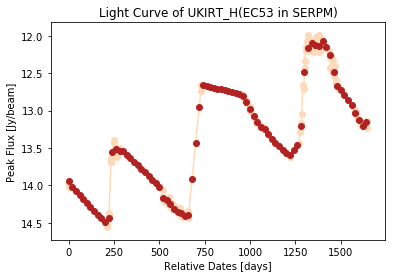

In [499]:
#========================Making even dataset==========================

#dates = np.array(ori_dates)
#pfluxes = np.array(ori_pfluxes)
#noises = np.array(ori_noises)

interval = 20.0

r_dates, r_fluxes, r_noises, ACF = LCA.AutoCorrelation(dates,pfluxes,noises,interval=interval,normalize=1,revolving=0)


#k = TF.TCCelebrities(k)
plt.figure()
plt.plot(dates,pfluxes,color='peachpuff')
plt.scatter(dates,pfluxes,color='peachpuff')
plt.errorbar(r_dates, r_fluxes, yerr=r_noises, fmt='o', color='firebrick')
#plt.annotate(Start_date+"~"+Last_date,xy=[0.60,0.15], xycoords="figure fraction") 

plt.xlabel('Relative Dates [days]')
plt.ylabel('Peak Flux [Jy/beam]')
plt.title('Light Curve of ' + wl + '('+ k + ' in '+ region +')')#plt.close()
if wl != "850":
    plt.gca().invert_yaxis()



plt.savefig(output_dir+ region +'_'+ k + '_LC_' + wl +option+"_"+str(interval)+ 'int.pdf')

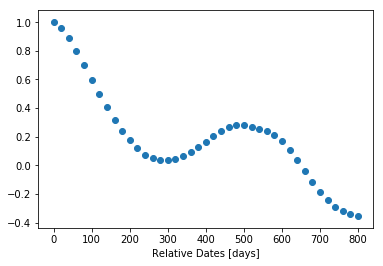

In [493]:
#============================ACF======================
plt.close()
plt.figure()
r_dates_plot = r_dates[0:int(len(r_dates)/2)]
plt.scatter(r_dates_plot,ACF)
plt.xlabel('Relative Dates [days]')
#plt.annotate("Peak at " + str(int(r_dates[np.where(ACF == ACF.max())]))+" days",xy=[0.40,0.15], xycoords="figure fraction")
plt.savefig(output_dir+ region +'_'+ k + '_ACF_' + wl +option+"_"+str(interval)+ 'int.pdf')


In [446]:
#temp[0]
#np.where(ACF[temp[0]:int(len(r_dates)/2)] == ACF[temp[0]:int(len(r_dates)/2)].max())
x = int(300/interval)
print(x)
print(ACF[temp:int(len(r_dates)/2)].max())
print(ACF[temp:int(len(r_dates)/2)][0])
print(np.where(ACF[temp:int(len(r_dates)/2)] == ACF[temp:int(len(r_dates)/2)].max())[0])
print(j)

15
0.2833248646564375
[-0.47021511]
[13]
[19]


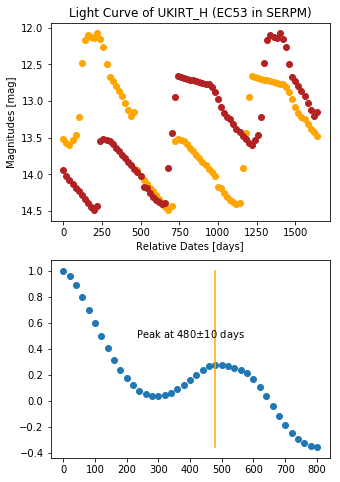

In [494]:
#======================Check shifted Figure ===========================

fig, ax = plt.subplots(2,1,figsize=(5,8))
start_ind = int(300/interval)
j = start_ind + np.where(ACF[start_ind:int(len(r_dates)/2)] == ACF[start_ind:int(len(r_dates)/2)].max())[0]
#j = 16
i = len(r_dates)-j[0]
ax[0].errorbar(r_dates,list(r_fluxes)[i:]+list(r_fluxes)[:i],yerr=list(r_noises)[i:]+list(r_noises)[:i], fmt='o', color='orange')
ax[0].errorbar(r_dates, r_fluxes, yerr=r_noises, fmt='o', color='firebrick')
if wl != "850":
    ax[0].invert_yaxis()
#ax[0].set(xlabel = 'Relative Dates [days]',ylabel = 'Peak Flux [Jy/beam]')
ax[0].set(xlabel = 'Relative Dates [days]',ylabel = 'Magnitudes [mag]')
ax[0].set_title('Light Curve of ' + wl + ' ('+ k + ' in '+ region +')')#plt.close()
ax[1].scatter(r_dates_plot,ACF)
ax[1].plot([j*interval,j*interval],[ACF.min(),ACF.max()],color="orange")
ax[1].annotate("Peak at {0:3.0f}$\pm${1:2.0f} days".format(j[0]*interval,interval/2),xy=[0.40,0.3], xycoords="figure fraction")
plt.savefig(output_dir+ region +'_'+ k + '_ACF_' + wl +option+"_"+str(interval)+ 'int_check.pdf')


In [305]:
r_dates[np.where(ACF==ACF.max())]

IndexError: too many indices for array

In [266]:
a = ([1,2,3,4,5])
for i in range(0,5):
    j = 5-i
    b = a[j:]
    c = a[:-j]
    print(b,c)